# Case Study
In this task, we are predicting Airline satisfaction of Customers based on the Reviews given by the Customers in different Categories such as On-board service, Leg room service, Baggage handling, Checkin service etc. 
Here, we have 25 features in which satisfaction is our target.

Step 1 : Data Understanding and Exploration
 
Step 2 : Data Preparation

Step 3 : Model Building and Training using various Models such as Logistic Regression, Decision Tree, K-nearest Neighbors, Random Forest

Step 4 : Evaluation using various metrics


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Understanding and Exploration

In [ ]:
# Read Data
df = pd.read_csv(r'/content/airline_pred.csv')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80467 entries, 0 to 80466
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         80467 non-null  int64  
 1   id                                 80467 non-null  int64  
 2   Gender                             80467 non-null  object 
 3   Customer Type                      80467 non-null  object 
 4   Age                                80467 non-null  int64  
 5   Type of Travel                     80467 non-null  object 
 6   Class                              80466 non-null  object 
 7   Flight Distance                    80466 non-null  float64
 8   Inflight wifi service              80466 non-null  float64
 9   Departure/Arrival time convenient  80466 non-null  float64
 10  Ease of Online booking             80466 non-null  float64
 11  Gate location                      80466 non-null  flo

In [ ]:
# Target variable
df['satisfaction'].value_counts()

neutral or dissatisfied    45532
satisfied                  34934
Name: satisfaction, dtype: int64

In [ ]:
# Check for Null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  1
Flight Distance                        1
Inflight wifi service                  1
Departure/Arrival time convenient      1
Ease of Online booking                 1
Gate location                          1
Food and drink                         1
Online boarding                        1
Seat comfort                           1
Inflight entertainment                 1
On-board service                       1
Leg room service                       1
Baggage handling                       1
Checkin service                        1
Inflight service                       1
Cleanliness                            1
Departure Delay in Minutes             1
Arrival Delay in Minutes             239
satisfaction    

In [ ]:
# Remove Null values
df.dropna(inplace = True)
df.shape

(80228, 25)

In [ ]:
# Check for Null values
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df['Gender'].value_counts()

Female    40807
Male      39421
Name: Gender, dtype: int64

In [ ]:
df['Customer Type'].value_counts()

Loyal Customer       65460
disloyal Customer    14768
Name: Customer Type, dtype: int64

In [ ]:
df['Type of Travel'].value_counts()

Business travel    55395
Personal Travel    24833
Name: Type of Travel, dtype: int64

In [ ]:
df['Class'].value_counts()

Business    38388
Eco         36030
Eco Plus     5810
Name: Class, dtype: int64

In [ ]:
df['Inflight wifi service'] = df['Inflight wifi service'].astype('object')
df['Inflight wifi service'].value_counts()

3.0    19990
2.0    19875
4.0    15302
1.0    13746
5.0     8887
0.0     2428
Name: Inflight wifi service, dtype: int64

In [ ]:
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].astype('object')
df['Departure/Arrival time convenient'].value_counts()

4.0    19744
5.0    17245
3.0    13902
2.0    13191
1.0    12014
0.0     4132
Name: Departure/Arrival time convenient, dtype: int64

In [ ]:
df['Ease of Online booking'] = df['Ease of Online booking'].astype('object')
df['Ease of Online booking'].value_counts()

3.0    18866
2.0    18514
4.0    15169
1.0    13570
5.0    10637
0.0     3472
Name: Ease of Online booking, dtype: int64

In [ ]:
df['Gate location'] = df['Gate location'].astype('object')
df['Gate location'].value_counts()

3.0    22082
4.0    18936
2.0    14961
1.0    13645
5.0    10603
0.0        1
Name: Gate location, dtype: int64

In [ ]:
df['Food and drink'] = df['Food and drink'].astype('object')
df['Food and drink'].value_counts()

4.0    18834
5.0    17297
3.0    17149
2.0    16883
1.0     9989
0.0       76
Name: Food and drink, dtype: int64

In [ ]:
df['Online boarding'] = df['Online boarding'].astype('object')
df['Online boarding'].value_counts()

4.0    23776
3.0    16788
5.0    15994
2.0    13579
1.0     8213
0.0     1878
Name: Online boarding, dtype: int64

In [ ]:
df['Seat comfort'] = df['Seat comfort'].astype('object')
df['Seat comfort'].value_counts()

4.0    24578
5.0    20475
3.0    14359
2.0    11415
1.0     9400
0.0        1
Name: Seat comfort, dtype: int64

In [ ]:
df['Inflight entertainment'] = df['Inflight entertainment'].astype('object')
df['Inflight entertainment'].value_counts()

4.0    22743
5.0    19464
3.0    14738
2.0    13564
1.0     9707
0.0       12
Name: Inflight entertainment, dtype: int64

In [ ]:
df['On-board service'] = df['On-board service'].astype('object')
df['On-board service'].value_counts()

4.0    23814
5.0    18262
3.0    17639
2.0    11329
1.0     9182
0.0        2
Name: On-board service, dtype: int64

In [ ]:
df['Leg room service'] = df['Leg room service'].astype('object')
df['Leg room service'].value_counts()

4.0    22269
5.0    18901
3.0    15627
2.0    15068
1.0     7994
0.0      369
Name: Leg room service, dtype: int64

In [ ]:
df['Baggage handling'] = df['Baggage handling'].astype('object')
df['Baggage handling'].value_counts()

4.0    28866
5.0    20949
3.0    15882
2.0     8910
1.0     5621
Name: Baggage handling, dtype: int64

In [ ]:
df['Checkin service'] = df['Checkin service'].astype('object')
df['On-board service'].value_counts()

4.0    23814
5.0    18262
3.0    17639
2.0    11329
1.0     9182
0.0        2
Name: On-board service, dtype: int64

In [ ]:
df['Inflight service'] = df['Inflight service'].astype('object')
df['Inflight service'].value_counts()

4.0    29330
5.0    20922
3.0    15597
2.0     8873
1.0     5504
0.0        2
Name: Inflight service, dtype: int64

In [ ]:
df['Cleanliness'] = df['Cleanliness'].astype('object')
df['Cleanliness'].value_counts()

4.0    20995
3.0    18940
5.0    17561
2.0    12403
1.0    10318
0.0       11
Name: Cleanliness, dtype: int64

In [ ]:
# Datatypes of Features
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure 

In [ ]:
# Numeric Features
Numerical_data = df.select_dtypes(include=['int64','float64'])
Numerical_data.head()

,Unnamed: 0,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460.0,25.0,18.0
1,1,5047,25,235.0,1.0,6.0
2,2,110028,26,1142.0,0.0,0.0
3,3,24026,25,562.0,11.0,9.0
4,4,119299,61,214.0,0.0,0.0


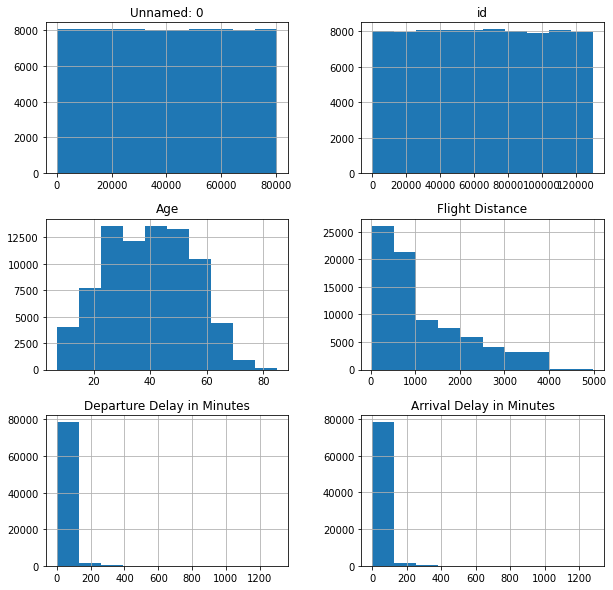

In [ ]:
# Histplot of Numeric data
Numerical_data.hist(figsize=(10,10))
plt.show()

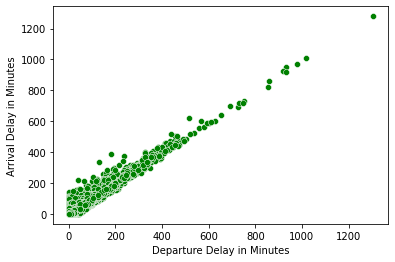

In [ ]:
# Arrival Delay vs Departure Delay
sns.scatterplot(data = Numerical_data, x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', color='green')

In [ ]:
# Drop Unwanted Columns
Numerical_data = Numerical_data.drop(columns=['Unnamed: 0','id'])

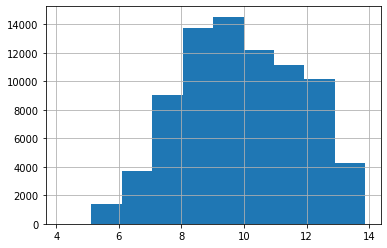

In [ ]:
# Using boxcox transformation
from scipy.stats import boxcox
Numerical_data['Flight Distance'],_ = boxcox(Numerical_data['Flight Distance'])
Numerical_data['Flight Distance'].hist()

In [ ]:
Numerical_data.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,8.656820,25.0,18.0
1,25,7.409880,1.0,6.0
2,26,10.493935,0.0,0.0
3,25,9.046276,11.0,9.0
4,61,7.243077,0.0,0.0


Note: We cannot apply boxcox on Departure Delay and Arrival Delay because they have some 0 values.

In [ ]:
# Categorical Features
Categorical_data = df.select_dtypes(include=['object'])
Categorical_data.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [ ]:
# Gender vs Type of Travel Plot
pd.crosstab(index=Categorical_data['Gender'], columns=Categorical_data['Customer Type'])

Customer Type,Loyal Customer,disloyal Customer
Gender,,
Female,32785,8022
Male,32675,6746


In [ ]:
# Class vs Type of Travel
pd.crosstab(Categorical_data['Class'], Categorical_data['Type of Travel'] )

Type of Travel,Business travel,Personal Travel
Class,,
Business,36710,1678
Eco,15635,20395
Eco Plus,3050,2760


In [ ]:
# Class vs Satisfication
pd.crosstab(Categorical_data['Class'], Categorical_data['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,11767,26621
Eco,29257,6773
Eco Plus,4370,1440


# Data Preparation

In [ ]:
# Label Encoding for Nominal Features
Categorical_data['Class'] = Categorical_data['Class'].map({'Business':2, 'Eco':0, 'Eco Plus':1})
Categorical_data['satisfaction'] = Categorical_data['satisfaction'].map({'neutral or dissatisfied':1, 'satisfied':0})

In [ ]:
df_encode = Categorical_data.loc[:,['Gender','Customer Type','Type of Travel']]
df_encode.shape

(80228, 3)

In [ ]:
# One hot encoding / Dummies
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_encode = pd.DataFrame(encoder.fit_transform(df_encode), columns=encoder.get_feature_names(df_encode.columns))
df_encode.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1.0,0.0,1.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
df_encode.isnull().sum()

Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
dtype: int64

In [ ]:
Categorical_data = pd.concat([Categorical_data, df_encode], axis=1)
Categorical_data.shape

(80466, 22)

In [ ]:
# Standardization of Numeric values
from sklearn.preprocessing import StandardScaler
df_num = pd.DataFrame(StandardScaler().fit_transform(Numerical_data), columns = Numerical_data.columns)
df_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.746215,-0.658007,0.269538,0.073872
1,-0.951344,-1.327129,-0.362146,-0.237570
2,-0.885105,0.327809,-0.388466,-0.393291
3,-0.951344,-0.449021,-0.098944,-0.159709
4,1.433268,-1.416637,-0.388466,-0.393291


In [ ]:
df_num.shape

(80228, 4)

In [ ]:
dF = pd.concat([df_num, Categorical_data], axis=1)
dF.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,-1.746215,-0.658007,0.269538,0.073872,Male,Loyal Customer,Personal Travel,1.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1.0,0.0,1.0
1,-0.951344,-1.327129,-0.362146,-0.237570,Male,disloyal Customer,Business travel,2.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1.0,1.0,0.0
2,-0.885105,0.327809,-0.388466,-0.393291,Female,Loyal Customer,Business travel,2.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0.0,0.0,0.0
3,-0.951344,-0.449021,-0.098944,-0.159709,Female,Loyal Customer,Business travel,2.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0.0,0.0,0.0
4,1.433268,-1.416637,-0.388466,-0.393291,Male,Loyal Customer,Business travel,2.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1.0,0.0,0.0


In [ ]:
dF.isnull().sum()

Age                                  238
Flight Distance                      238
Departure Delay in Minutes           238
Arrival Delay in Minutes             238
Gender                               238
Customer Type                        238
Type of Travel                       238
Class                                238
Inflight wifi service                238
Departure/Arrival time convenient    238
Ease of Online booking               238
Gate location                        238
Food and drink                       238
Online boarding                      238
Seat comfort                         238
Inflight entertainment               238
On-board service                     238
Leg room service                     238
Baggage handling                     238
Checkin service                      238
Inflight service                     238
Cleanliness                          238
satisfaction                         238
Gender_Male                          238
Customer Type_di

In [ ]:
dF.dropna(inplace=True)

In [ ]:
data = dF.drop(columns=['Gender','Customer Type','Type of Travel','satisfaction'])
target = dF['satisfaction']
print(data.shape)
print(target.shape)

(79990, 22)
(79990,)


In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63992, 22)
(63992,)
(15998, 22)
(15998,)


# Model Building and Training

In [ ]:
# Use RFE for Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR_RFE = RFE(estimator=LR ,
            n_features_to_select=10)
LR_RFE.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
# Features and Ranking
temp_df = pd.DataFrame({'Columns': X_train.columns, 'Included': LR_RFE.support_, 'Ranking': LR_RFE.ranking_})
temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
4,Class,True,1
5,Inflight wifi service,True,1
6,Departure/Arrival time convenient,True,1
7,Ease of Online booking,True,1
10,Online boarding,True,1
12,Inflight entertainment,True,1
13,On-board service,True,1
14,Leg room service,True,1
16,Checkin service,True,1
18,Cleanliness,True,1


In [ ]:
X_train_cols = list(X_train.columns[LR_RFE.support_])

In [ ]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(63992, 10)

Note : We don't check correlation because there is only one numeric column

In [ ]:
X_train_rfe.head()

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service
22160,2.0,4,0,4,2,4,1,4,5,3
56399,2.0,5,2,2,1,5,4,4,2,3
69109,2.0,0,5,0,4,5,5,5,5,4
77865,2.0,3,4,3,3,3,2,3,2,3
27773,2.0,4,4,4,4,5,4,4,4,4


In [ ]:
X_test_rfe = X_test[X_train_cols]

____________________________________________________________________________

In [ ]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV
tuned_hyperparameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100] ,'penalty':['l1','l2']}]

LR = GridSearchCV(LogisticRegression(), tuned_hyperparameters)
LR.fit(X_train_rfe, y_train)
print(LR.best_params_)
print(LR.best_estimator_)
print(LR.score(X_test_rfe, y_test))
y_test_LR = LR.predict(X_test_rfe)

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001)
0.8414096916299559


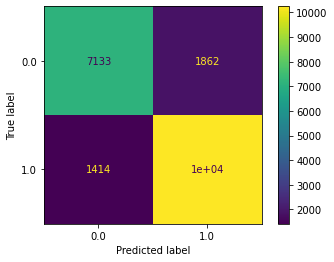

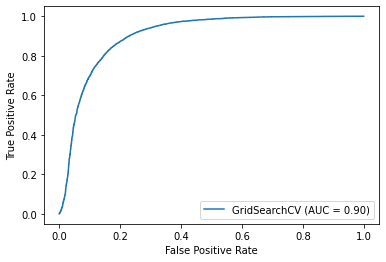

In [ ]:
# Confusion Matrix and ROC-AUC Curve
metrics.plot_confusion_matrix(LR, X_test_rfe, y_test)
metrics.plot_roc_curve(LR, X_test_rfe,y_test)

In [ ]:
# Precision, Recall and F1-score
target_names = ['neutral or dissatisfied','satisfied']
print(metrics.classification_report(y_test, y_test_LR, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.79      0.81      8995
              satisfied       0.85      0.88      0.86     11662

               accuracy                           0.84     20657
              macro avg       0.84      0.84      0.84     20657
           weighted avg       0.84      0.84      0.84     20657



__________________________________________________________________________________________________________

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = [{ 'criterion' :['gini', 'entropy'], 'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
DTC = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv = 5)
DTC.fit(X_train_rfe, y_train)
print('Best Parameters for Decision Tree Classifier :\n')
print(DTC.best_params_)
print(DTC.best_estimator_)
print(DTC.score(X_test_rfe, y_test))
y_test_DTC = DTC.predict(X_test_rfe)

Best Parameters for Decision Tree Classifier :

{'criterion': 'gini', 'max_depth': 12}
DecisionTreeClassifier(max_depth=12)
0.9318874957641478


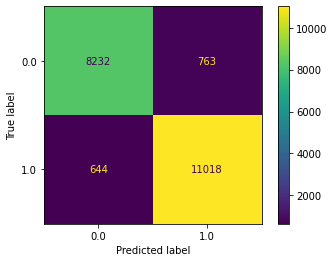

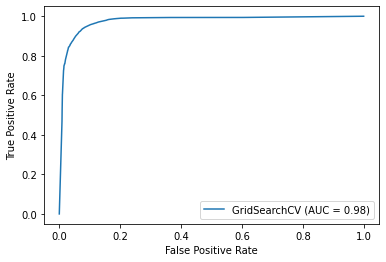

In [ ]:
# Confusion Matrix and ROC AUC Curve
metrics.plot_confusion_matrix(DTC, X_test_rfe, y_test)
metrics.plot_roc_curve(DTC, X_test_rfe,y_test)

In [ ]:
# Precision, Recall and F1-score
target_names = ['neutral or dissatisfied','satisfied']
print(metrics.classification_report(y_test, y_test_DTC, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.92      0.92      8995
              satisfied       0.94      0.94      0.94     11662

               accuracy                           0.93     20657
              macro avg       0.93      0.93      0.93     20657
           weighted avg       0.93      0.93      0.93     20657



_________________________________________________________________________________________

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'n_neighbors':[5,7,9,13,17], 'p':[1,2,3,4]}]

KNeighbors = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
KNeighbors.fit(X_train_rfe, y_train)
print(KNeighbors.best_params_)
print(KNeighbors.best_estimator_)
print(KNeighbors.score(X_test_rfe, y_test))
y_test_KNN = KNeighbors.predict(X_test_rfe)

{'n_neighbors': 17, 'p': 1}
KNeighborsClassifier(n_neighbors=17, p=1)
0.9280631263010117


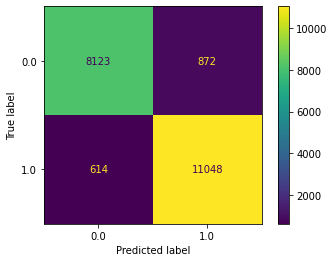

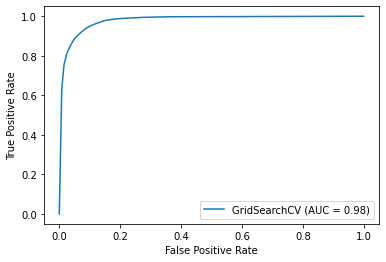

In [ ]:
# Confusion Matrix and ROC-AUC Plot
metrics.plot_confusion_matrix(KNeighbors, X_test_rfe, y_test)
metrics.plot_roc_curve(KNeighbors, X_test_rfe, y_test)

In [ ]:
# Precision, Recall and F1-score
target_names = ['neutral or dissatisfied','satisfied']
print(metrics.classification_report(y_test, y_test_KNN, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.90      0.92      8995
              satisfied       0.93      0.95      0.94     11662

               accuracy                           0.93     20657
              macro avg       0.93      0.93      0.93     20657
           weighted avg       0.93      0.93      0.93     20657



_____________________________________________________________________________

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tuned_parameters = [{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]
RF = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='accuracy')
RF.fit(X_train_rfe, y_train)
print(RF.best_params_)
print(RF.best_estimator_)
print(RF.score(X_test_rfe, y_test))
y_test_RF = RF.predict(X_test_rfe)

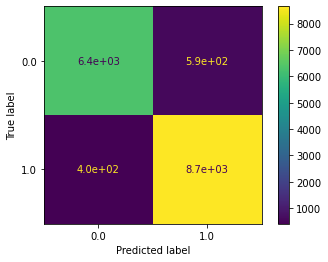

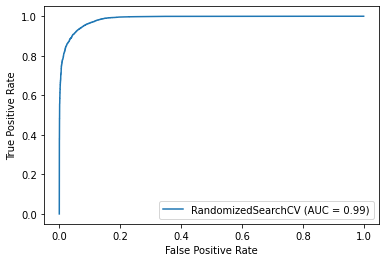

In [ ]:
# Confusion Matrix and ROC-AUC Plot
from sklearn import metrics
metrics.plot_confusion_matrix(RF, X_test_rfe, y_test)
metrics.plot_roc_curve(RF, X_test_rfe, y_test)

In [ ]:
# Precision, Recall and F1-score
target_names = ['neutral or dissatisfied','satisfied']
print(metrics.classification_report(y_test, y_test_RF, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.92      0.93      6940
              satisfied       0.94      0.96      0.95      9058

               accuracy                           0.94     15998
              macro avg       0.94      0.94      0.94     15998
           weighted avg       0.94      0.94      0.94     15998



Random Forest performs better than other models, having accuracy of 0.93 and F1 score of 0.94